In [105]:
import pandas as pd
import requests as r
import numpy as np
pd.set_option("display.max_columns", None)
import json
import requests as r
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#Reading the file
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [79]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


*Analysing the data EDA*

In [80]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [81]:
df.shape

(9827, 9)

In [82]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [84]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [85]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [88]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

**Dropping Overview, Original_Languege
and Poster-Url**

In [89]:
cols = ['Overview','Original_Language','Poster_Url']

In [90]:
df.drop(cols,axis=1,inplace=True)

In [91]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [92]:
df.sample(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
3305,1997,Neon Genesis Evangelion: Death and Rebirth,28.129,275,7.5,"Drama, Science Fiction, Animation"
5365,2010,The Nutcracker: The Untold Story,19.949,151,5.2,"Music, Fantasy, Action, Family"
1956,2015,Beyond the Boundary: I'll Be Here – Past,41.259,44,6.9,"Animation, Fantasy, Action, Drama, Comedy"
696,2021,Night Teeth,84.137,487,6.6,"Horror, Thriller, Action"
143,2022,The Exorcism of God,226.771,7,5.6,Horror


**categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.**

In [93]:
def categorized_col(df,col,labels):
    edges=[
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')    
    return df

In [94]:
labels=['not_popular','below_avg','average','popular']

categorized_col(df,col='Vote_Average',labels=labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [95]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [96]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [97]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

**we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie**

In [98]:
df['Genre']=df['Genre'].str.split(', ')

df=df.explode('Genre').reset_index(drop=True)
df.sample(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
4880,1990,GoodFellas,44.572,9860,popular,Drama
2821,2014,Rio 2,65.496,2779,below_avg,Family
20579,1963,The Haunting,15.530,445,popular,Horror
15003,2021,We Couldn't Become Adults,19.380,9,below_avg,Romance
13642,1986,King Kong Lives,20.768,147,not_popular,Adventure
13688,2020,The Beach House,20.696,61,not_popular,Horror
3089,2013,Pixie Hollow Bake Off,61.328,35,average,Animation
24983,2019,Life Like,13.547,161,below_avg,Science Fiction
13754,2007,Winx Club: The Secret of the Lost Kingdom,20.623,178,average,Fantasy
21059,2008,2012 Doomsday,15.267,93,not_popular,Fantasy


In [101]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [104]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

**Data Visualization**

In [107]:
sns.set_style('whitegrid')

In [109]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

**Q1: What is the most frequent genre in
the dataset?**

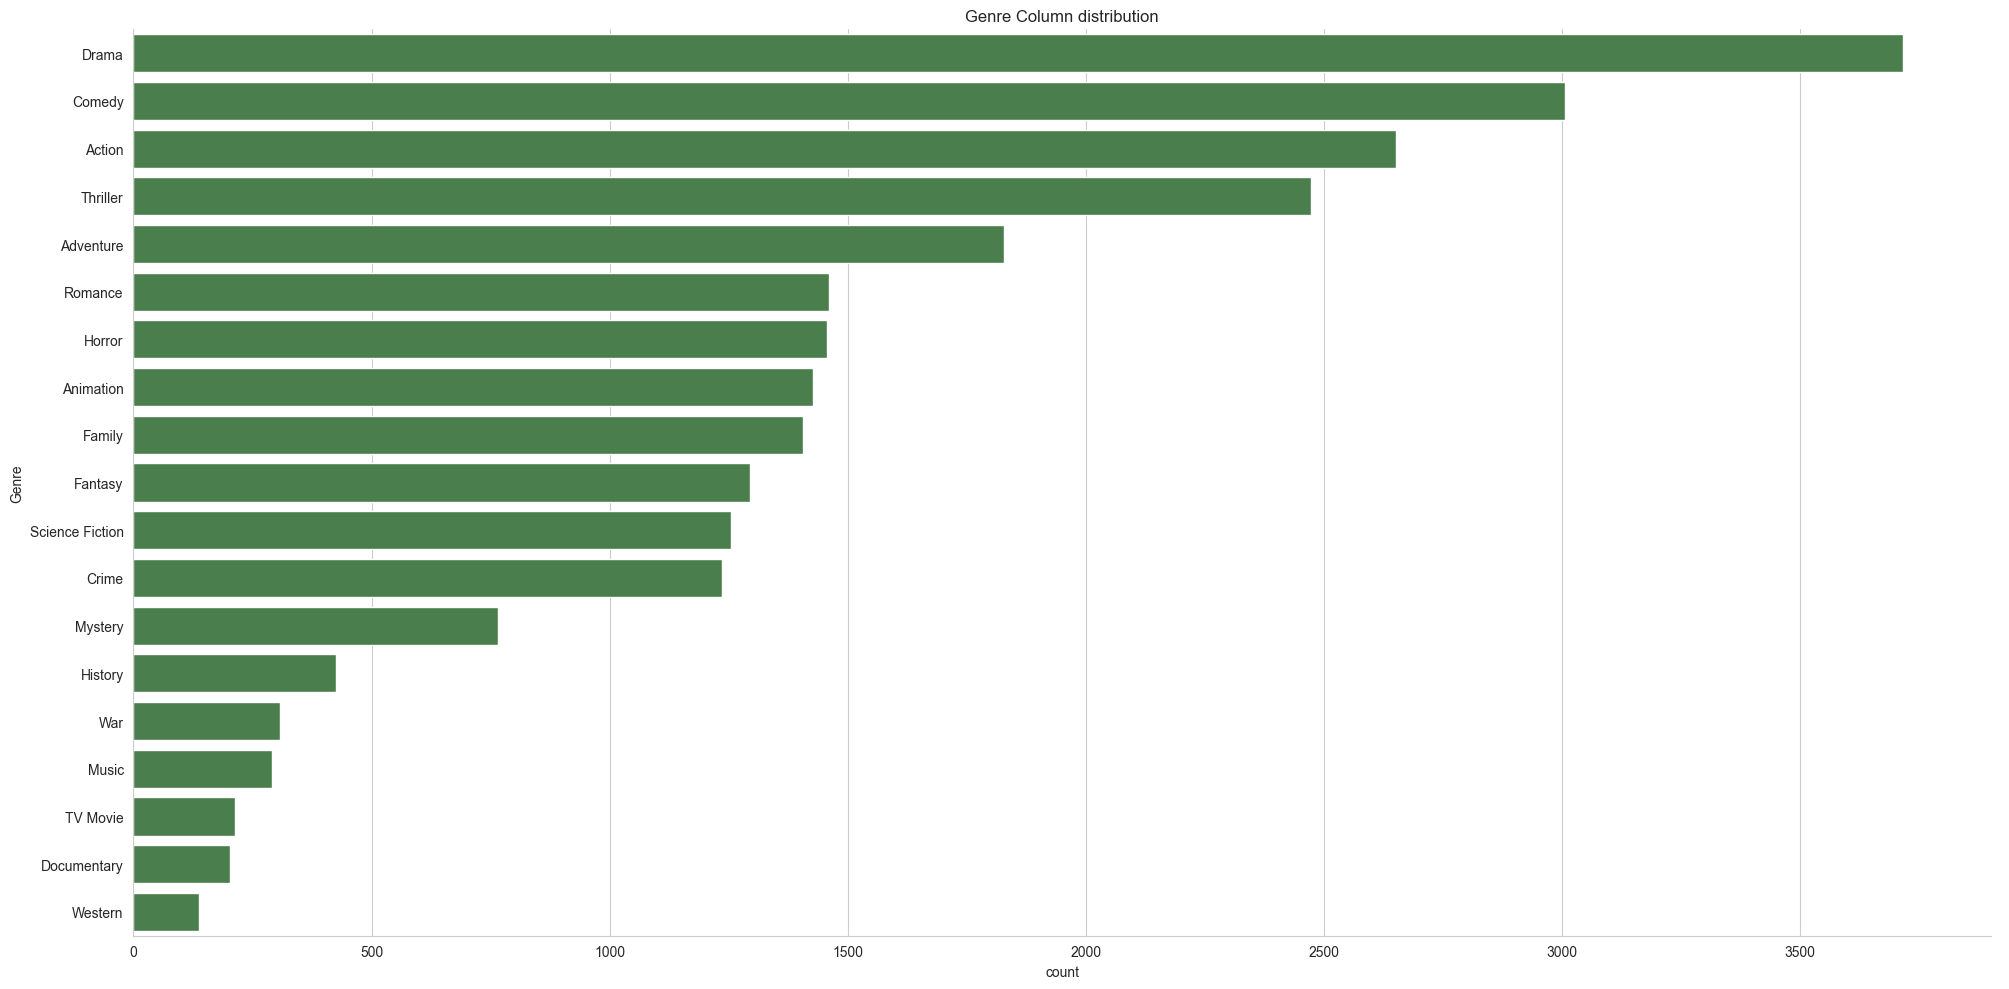

In [126]:
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    color='#428745',
    height=10,   # height in inches (per facet)
    aspect=2, # width = height × aspect ratio
)
plt.title('Genre Column distribution')
plt.tight_layout()
plt.show()

**Q2: What genres has highest votes?**

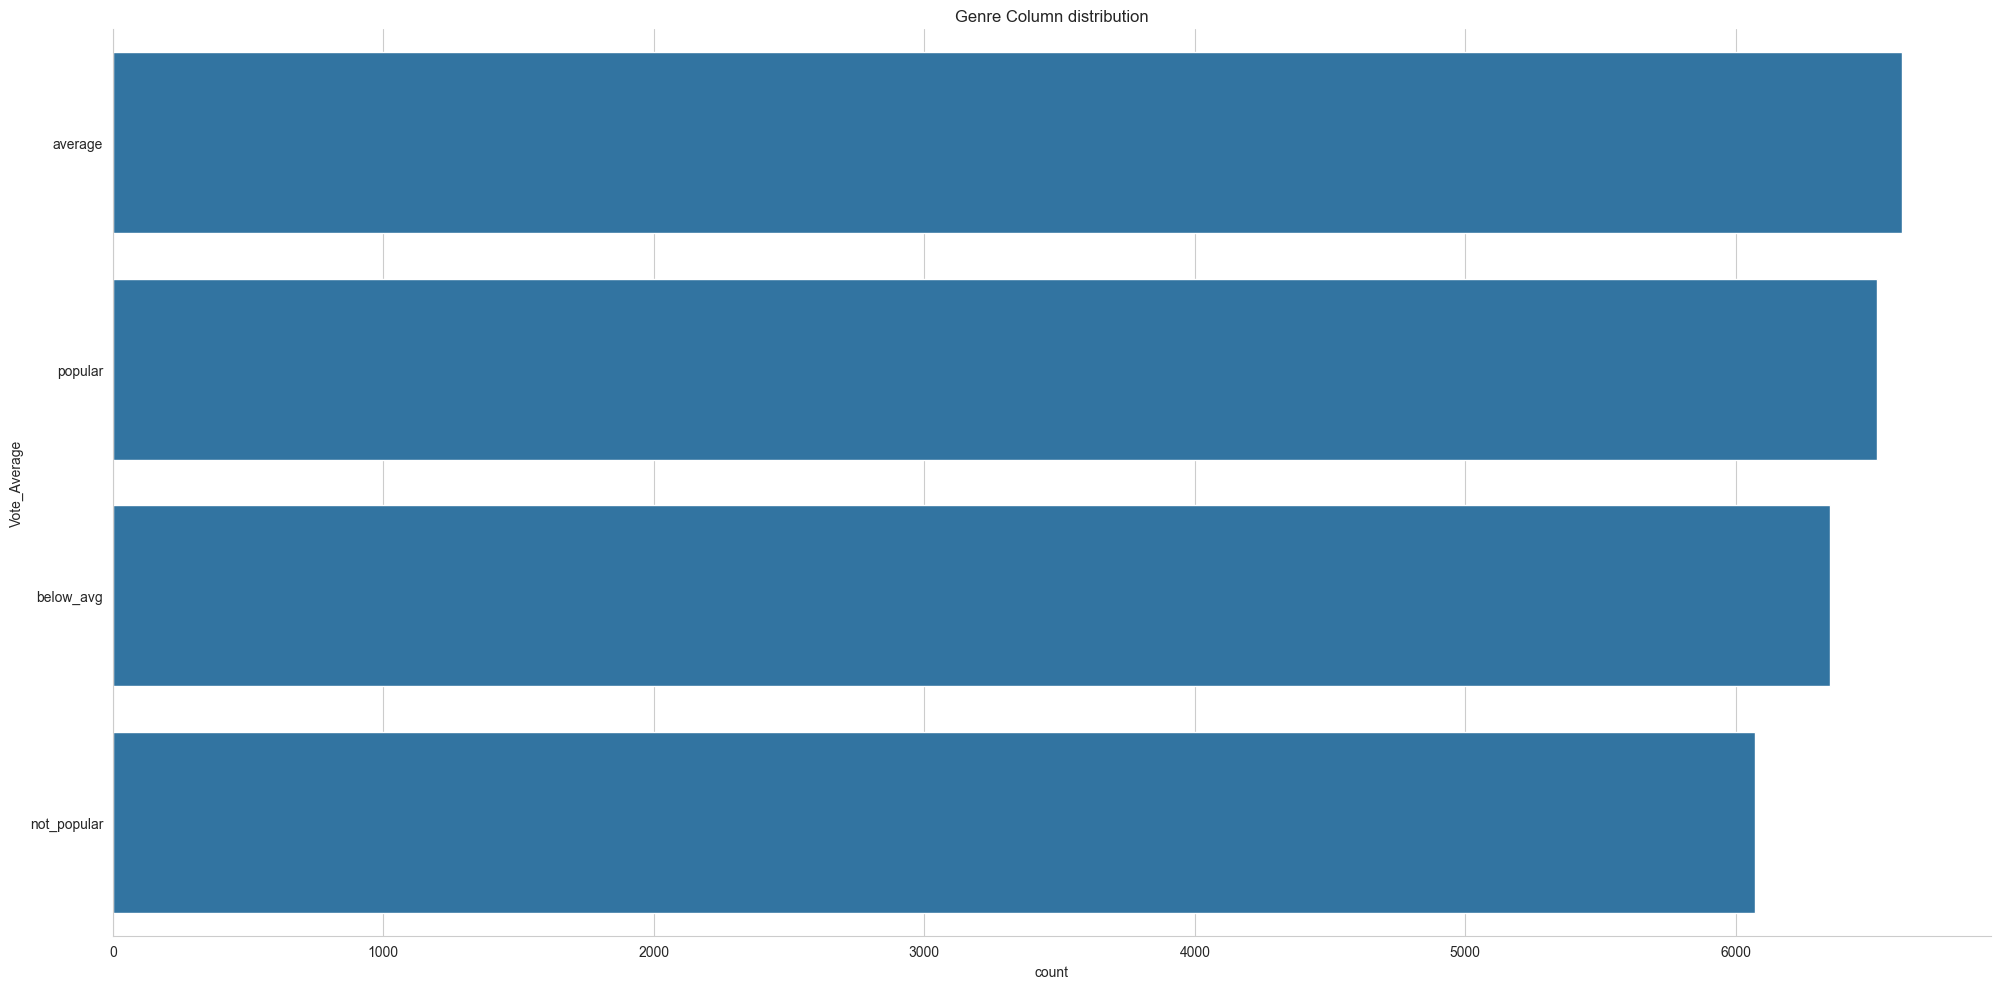

In [127]:
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    height=10,   # height in inches (per facet)
    aspect=2     # width = height × aspect ratio
)
plt.title('Genre Column distribution')
plt.tight_layout()
plt.show()

**Q4: What movie got the highest popularity? what's
its genre?**

In [129]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


****Q4: What movie got the lowest popularity? what's
its genre?****

In [130]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


**Q5: Which year has the most filmmed movies?**

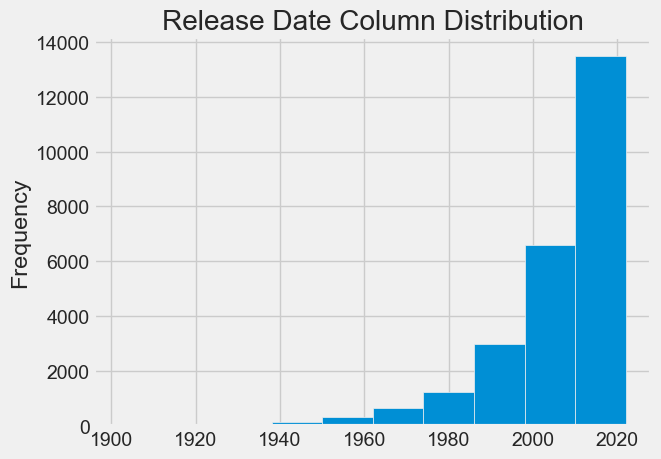

In [135]:
plt.style.use('fivethirtyeight')
df['Release_Date'].plot(kind='hist')
plt.title('Release Date Column Distribution')
plt.show()